In [1]:
%pip install tensorflow
%pip install Pillow
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

In [3]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [4]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [5]:
tr_df = train_df('D:\work\DSAI PROJECT\MRI 2.0\Training')
tr_df

,Class Path,Class
0,D:\work\DSAI PROJECT\MRI 2.0\Training\glioma_t...,glioma_tumor
1,D:\work\DSAI PROJECT\MRI 2.0\Training\glioma_t...,glioma_tumor
2,D:\work\DSAI PROJECT\MRI 2.0\Training\glioma_t...,glioma_tumor
3,D:\work\DSAI PROJECT\MRI 2.0\Training\glioma_t...,glioma_tumor
4,D:\work\DSAI PROJECT\MRI 2.0\Training\glioma_t...,glioma_tumor
...,...,...
2865,D:\work\DSAI PROJECT\MRI 2.0\Training\pituitar...,pituitary_tumor
2866,D:\work\DSAI PROJECT\MRI 2.0\Training\pituitar...,pituitary_tumor
2867,D:\work\DSAI PROJECT\MRI 2.0\Training\pituitar...,pituitary_tumor
2868,D:\work\DSAI PROJECT\MRI 2.0\Training\pituitar...,pituitary_tumor


In [6]:
ts_df = test_df('D:\work\DSAI PROJECT\MRI 2.0\Testing')
ts_df

,Class Path,Class
0,D:\work\DSAI PROJECT\MRI 2.0\Testing\glioma_tu...,glioma_tumor
1,D:\work\DSAI PROJECT\MRI 2.0\Testing\glioma_tu...,glioma_tumor
2,D:\work\DSAI PROJECT\MRI 2.0\Testing\glioma_tu...,glioma_tumor
3,D:\work\DSAI PROJECT\MRI 2.0\Testing\glioma_tu...,glioma_tumor
4,D:\work\DSAI PROJECT\MRI 2.0\Testing\glioma_tu...,glioma_tumor
...,...,...
389,D:\work\DSAI PROJECT\MRI 2.0\Testing\pituitary...,pituitary_tumor
390,D:\work\DSAI PROJECT\MRI 2.0\Testing\pituitary...,pituitary_tumor
391,D:\work\DSAI PROJECT\MRI 2.0\Testing\pituitary...,pituitary_tumor
392,D:\work\DSAI PROJECT\MRI 2.0\Testing\pituitary...,pituitary_tumor


In [7]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=42, stratify=ts_df['Class'])
valid_df

,Class Path,Class
203,D:\work\DSAI PROJECT\MRI 2.0\Testing\meningiom...,meningioma_tumor
65,D:\work\DSAI PROJECT\MRI 2.0\Testing\glioma_tu...,glioma_tumor
195,D:\work\DSAI PROJECT\MRI 2.0\Testing\meningiom...,meningioma_tumor
332,D:\work\DSAI PROJECT\MRI 2.0\Testing\pituitary...,pituitary_tumor
357,D:\work\DSAI PROJECT\MRI 2.0\Testing\pituitary...,pituitary_tumor
...,...,...
321,D:\work\DSAI PROJECT\MRI 2.0\Testing\pituitary...,pituitary_tumor
47,D:\work\DSAI PROJECT\MRI 2.0\Testing\glioma_tu...,glioma_tumor
193,D:\work\DSAI PROJECT\MRI 2.0\Testing\meningiom...,meningioma_tumor
153,D:\work\DSAI PROJECT\MRI 2.0\Testing\meningiom...,meningioma_tumor


In [8]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 2870 validated image filenames belonging to 4 classes.
Found 197 validated image filenames belonging to 4 classes.
Found 197 validated image filenames belonging to 4 classes.


In [9]:
img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

base_model.trainable = False

inputs = Input(shape = img_shape)

x = base_model(inputs)

x = Flatten()(x)

x = Dropout(rate= 0.3)(x)
x = Dense(128, activation= 'relu')(x)
x = Dropout(rate= 0.25)(x)
x = Dense(4, activation= 'softmax')(x)

model = Model(inputs, x)

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

In [10]:
hist = model.fit(tr_gen,
                 epochs=5,
                 validation_data=valid_gen,
                 shuffle= False)

Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 315s 3s/step - accuracy: 0.4931 - loss: 1.5291 - precision: 0.5232 - recall: 0.4227 - val_accuracy: 0.5228 - val_loss: 1.2076 - val_precision: 0.6000 - val_recall: 0.3655
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - accuracy: 0.7036 - loss: 0.7190 - precision: 0.7463 - recall: 0.6361 - val_accuracy: 0.5838 - val_loss: 1.1754 - val_precision: 0.6184 - val_recall: 0.4772
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 328s 4s/step - accuracy: 0.7661 - loss: 0.6053 - precision: 0.8182 - recall: 0.7255 - val_accuracy: 0.6041 - val_loss: 1.1686 - val_precision: 0.6727 - val_recall: 0.5635
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 333s 4s/step - accuracy: 0.7829 - loss: 0.5540 - precision: 0.8160 - recall: 0.7477 - val_accuracy: 0.6345 - val_loss: 1.2157 - val_precision: 0.6497 - val_recall: 0.5838
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 343s 4s/step - accuracy: 0.8146 - loss: 0.4975 - precision: 0.8283 - recall: 0.7867 - val_accuracy: 0.6447 - val_loss: 1.2199 - val

In [11]:
hist.history.keys()

tr_gen.class_indices

len(base_model.layers)

133

In [12]:
base_model.trainable = True
for layer in base_model.layers[:50]:
    layer.trainable = False

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

history_fine = model.fit(tr_gen,
                 epochs=5,
                 validation_data=valid_gen,
                 shuffle= False)

Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 915s 10s/step - accuracy: 0.8202 - loss: 0.5030 - precision_1: 0.8421 - recall_1: 0.7960 - val_accuracy: 0.8020 - val_loss: 1.3702 - val_precision_1: 0.8010 - val_recall_1: 0.7970
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 859s 10s/step - accuracy: 0.9794 - loss: 0.0628 - precision_1: 0.9808 - recall_1: 0.9794 - val_accuracy: 0.8223 - val_loss: 1.1254 - val_precision_1: 0.8223 - val_recall_1: 0.8223
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 865s 10s/step - accuracy: 0.9933 - loss: 0.0209 - precision_1: 0.9933 - recall_1: 0.9933 - val_accuracy: 0.8376 - val_loss: 1.3004 - val_precision_1: 0.8376 - val_recall_1: 0.8376
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 861s 10s/step - accuracy: 0.9970 - loss: 0.0158 - precision_1: 0.9970 - recall_1: 0.9970 - val_accuracy: 0.8477 - val_loss: 1.1726 - val_precision_1: 0.8477 - val_recall_1: 0.8477
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 884s 10s/step - accuracy: 0.9940 - loss: 0.0133 - precision_1: 0.9941 - recall_1: 0.9940 - val_

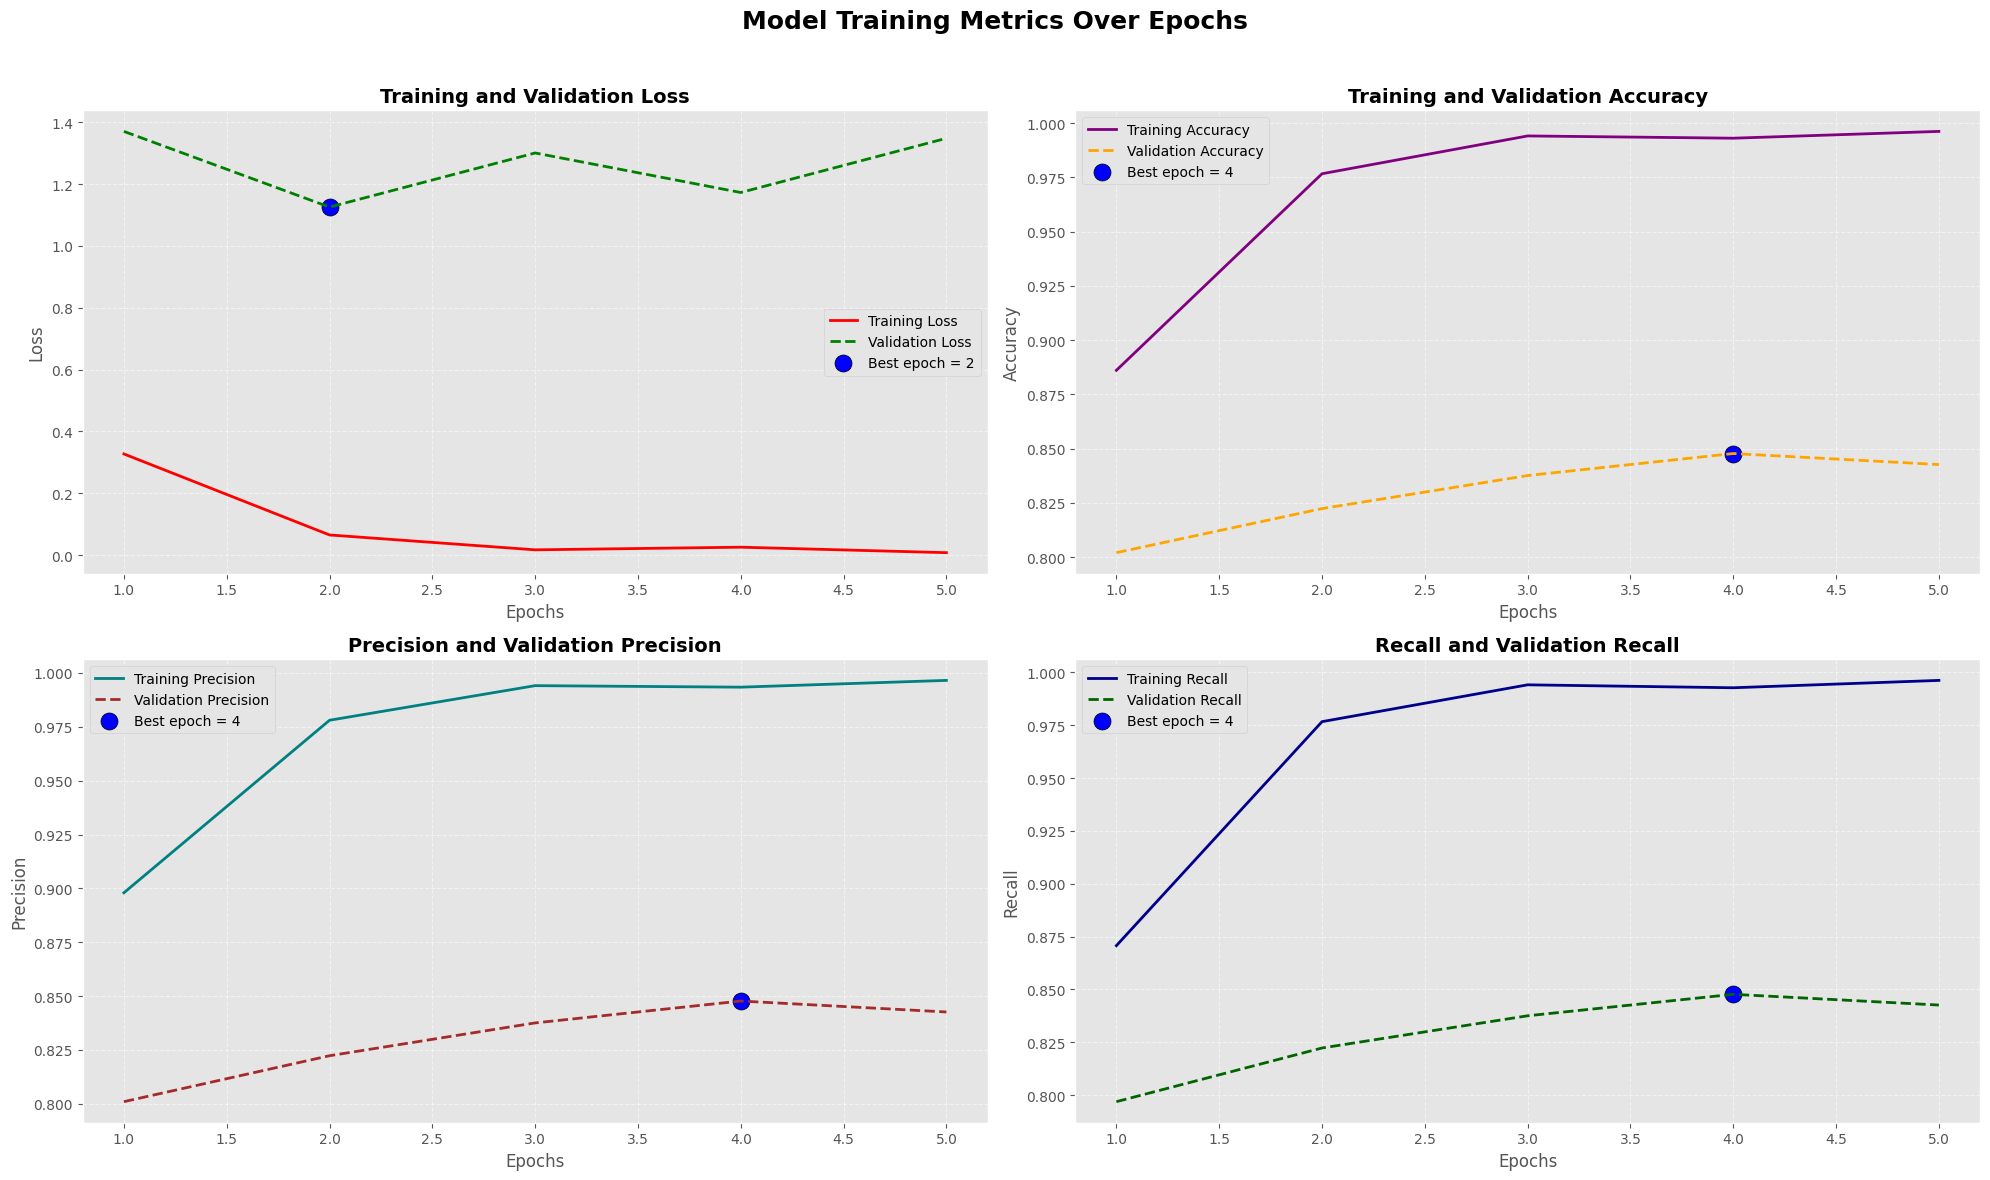

In [16]:
tr_acc = history_fine.history['accuracy']
tr_loss = history_fine.history['loss']
tr_per = history_fine.history['precision_1']
tr_recall = history_fine.history['recall_1']
val_acc = history_fine.history['val_accuracy']
val_loss = history_fine.history['val_loss']
val_per = history_fine.history['val_precision_1']
val_recall = history_fine.history['val_recall_1']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'

# Define a modern style
plt.style.use('ggplot')
plt.figure(figsize=(20, 12))

# Plot Training and Validation Loss
plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, color='red', label='Training Loss', linewidth=2)
plt.plot(Epochs, val_loss, color='green', label='Validation Loss', linestyle='--', linewidth=2)
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label, edgecolors='black')
plt.title('Training and Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Plot Training and Validation Accuracy
plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, color='purple', label='Training Accuracy', linewidth=2)
plt.plot(Epochs, val_acc, color='orange', label='Validation Accuracy', linestyle='--', linewidth=2)
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label, edgecolors='black')
plt.title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Plot Precision and Validation Precision
plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, color='teal', label='Training Precision', linewidth=2)
plt.plot(Epochs, val_per, color='brown', label='Validation Precision', linestyle='--', linewidth=2)
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label, edgecolors='black')
plt.title('Precision and Validation Precision', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Plot Recall and Validation Recall
plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, color='darkblue', label='Training Recall', linewidth=2)
plt.plot(Epochs, val_recall, color='darkgreen', label='Validation Recall', linestyle='--', linewidth=2)
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label, edgecolors='black')
plt.title('Recall and Validation Recall', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Add a title for the entire figure
plt.suptitle('Model Training Metrics Over Epochs', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [17]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

90/90 ━━━━━━━━━━━━━━━━━━━━ 280s 3s/step - accuracy: 0.9990 - loss: 0.0012 - precision_1: 0.9990 - recall_1: 0.9990
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.8581 - loss: 1.2078 - precision_1: 0.8581 - recall_1: 0.8581
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8412 - loss: 1.1377 - precision_1: 0.8412 - recall_1: 0.8412
Train Loss: 0.0009
Train Accuracy: 99.93%
--------------------
Validation Loss: 1.3466
Validation Accuracy: 84.77%
--------------------
Test Loss: 1.3827
Test Accuracy: 82.23%


In [18]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = tr_gen.class_indices

13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step


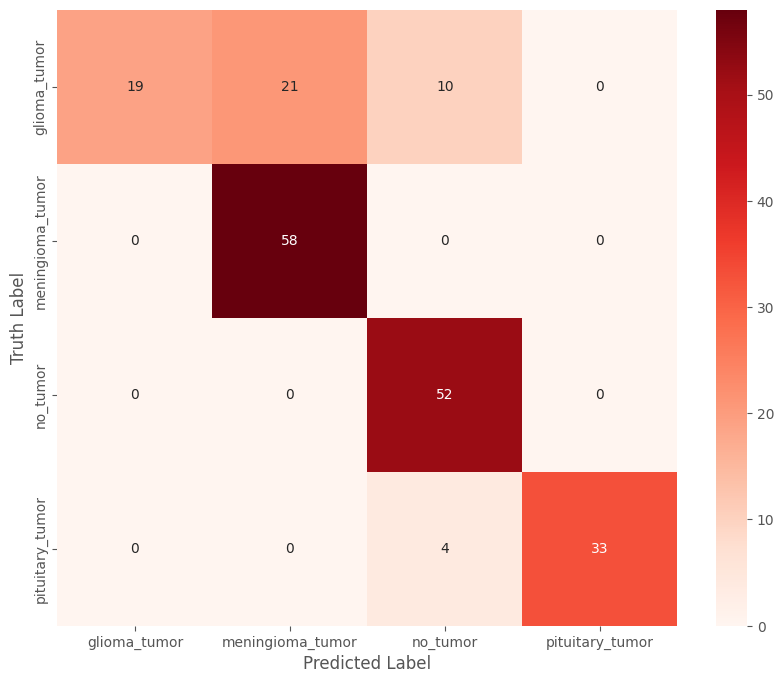

In [19]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [20]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        50
           1       0.73      1.00      0.85        58
           2       0.79      1.00      0.88        52
           3       1.00      0.89      0.94        37

    accuracy                           0.82       197
   macro avg       0.88      0.82      0.81       197
weighted avg       0.87      0.82      0.80       197



In [21]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step


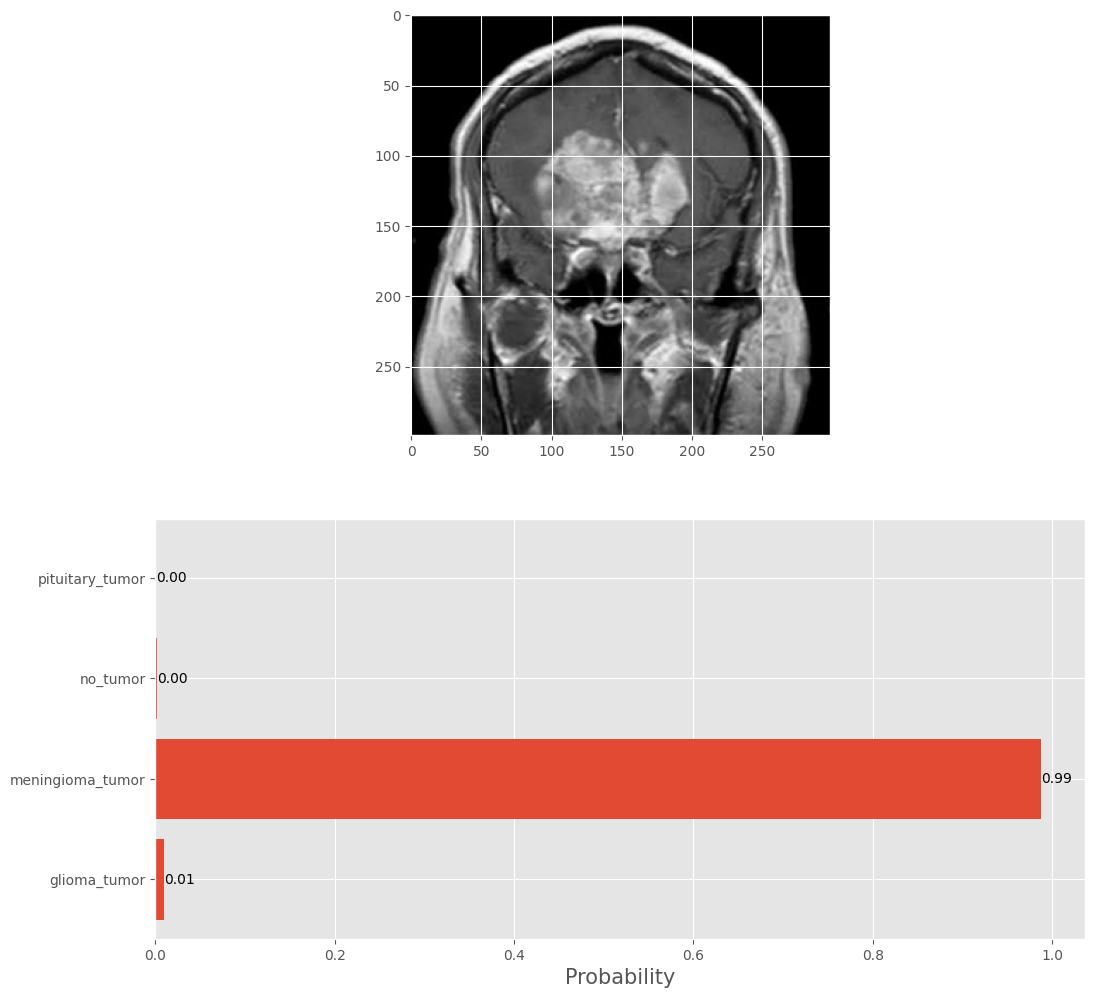

In [22]:
predict('D:\work\DSAI PROJECT\MRI 2.0\Testing\glioma_tumor\image(9).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


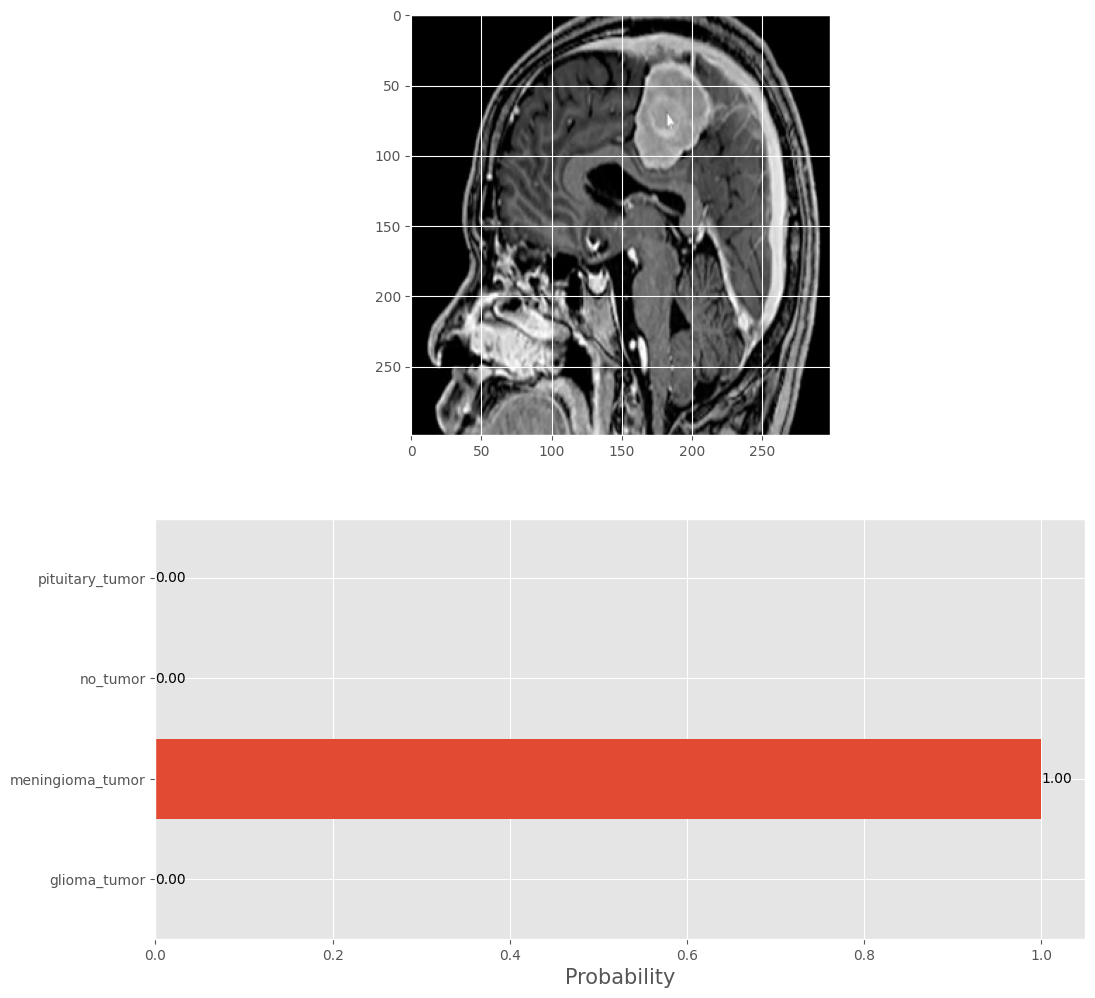

In [23]:
predict('D:\work\DSAI PROJECT\MRI 2.0\Testing\meningioma_tumor\image(18).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


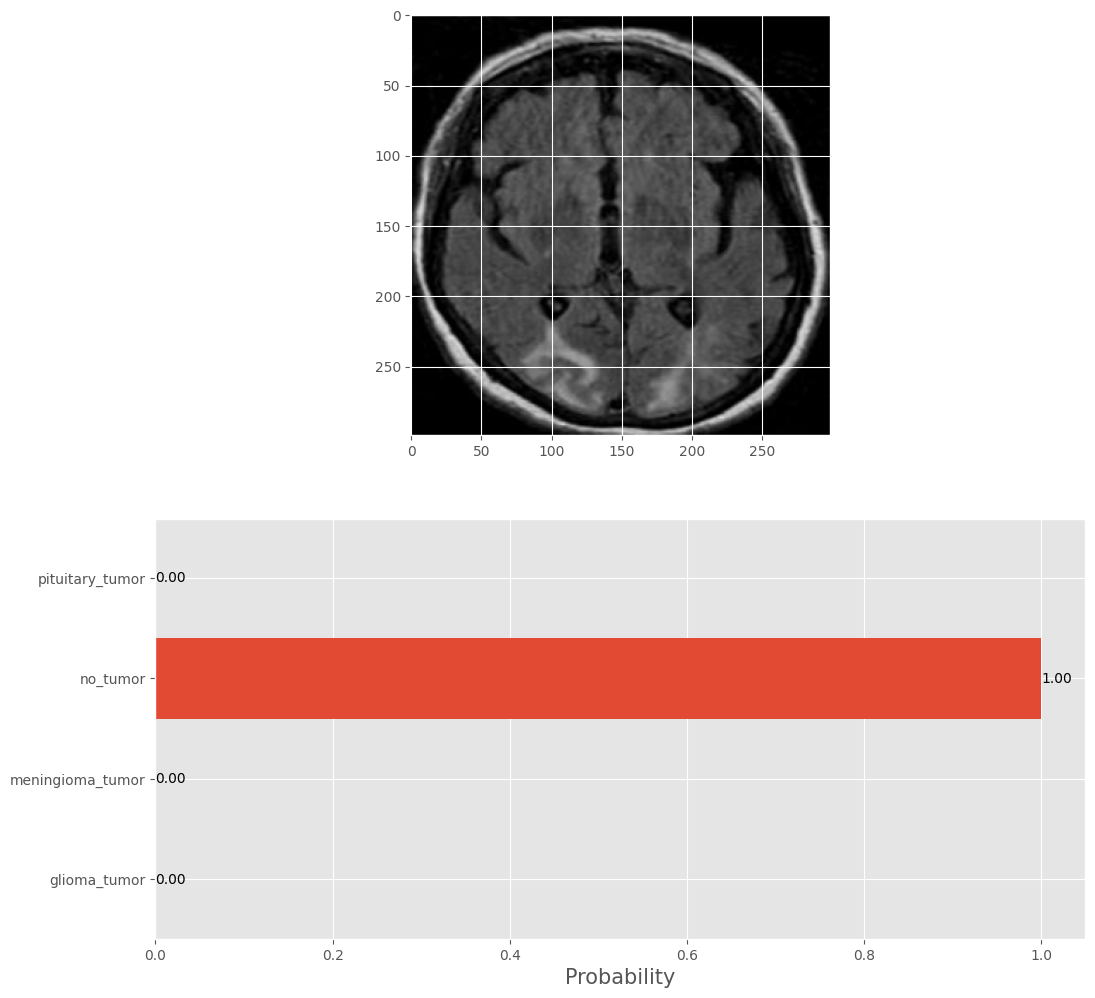

In [24]:
predict(r"D:\work\DSAI PROJECT\MRI 2.0\Testing\no_tumor\image(3).jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


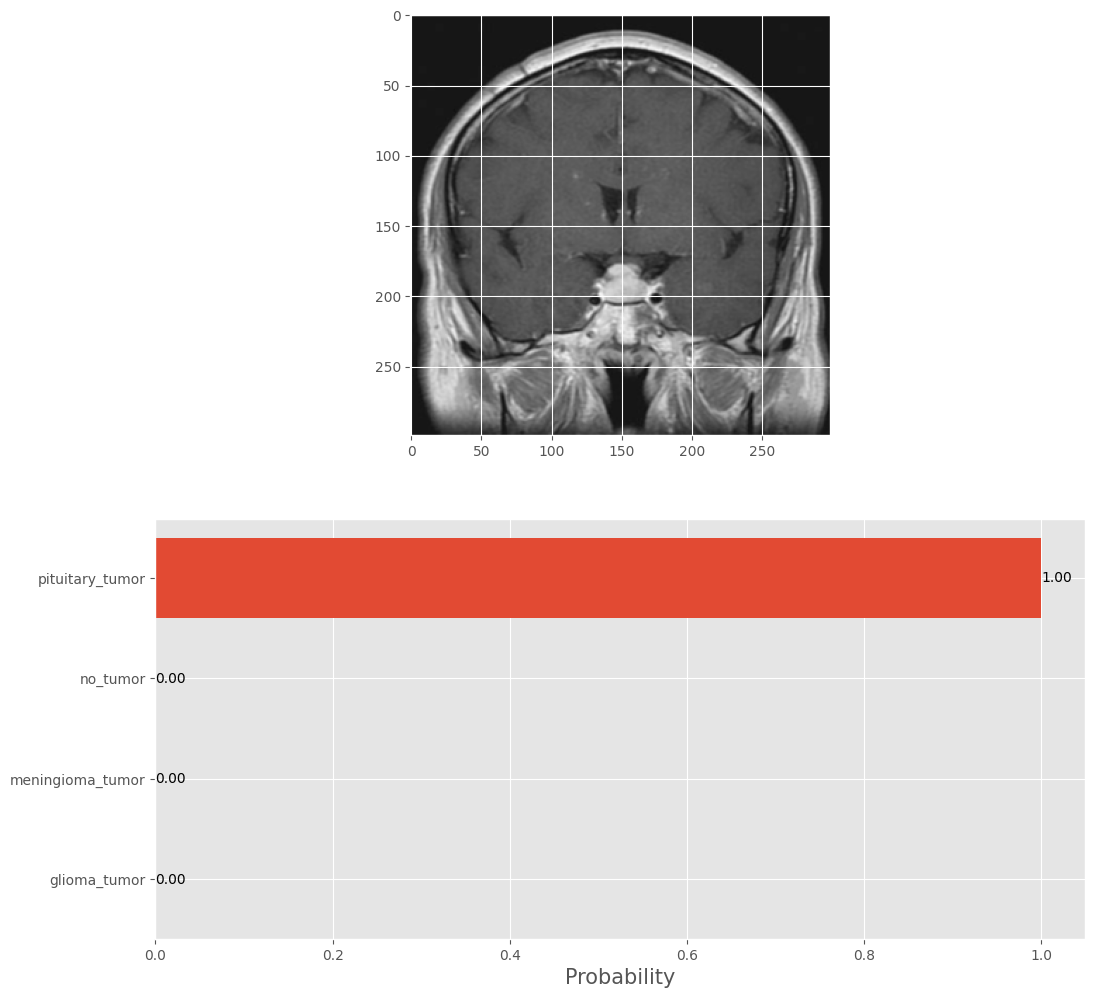

In [25]:
predict('D:\work\DSAI PROJECT\MRI 2.0\Testing\pituitary_tumor\image(10).jpg')

In [31]:
model.save('Brain_6.h5')